In [20]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
d=pd.read_csv('/content/drive/MyDrive/Datasets/Position_Salaries (1).csv')
d

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
d.isna().sum()

,0
Position,0
Level,0
Salary,0


In [5]:
d.dtypes

,0
Position,object
Level,int64
Salary,int64


In [6]:
X=d.iloc[:,1:-1]
X
y=d.iloc[:,-1]

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [8]:
y_pred=lr.predict(X)
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [9]:
result=pd.DataFrame({'Actual':y,'Predicted':y_pred})
result

,Actual,Predicted
0,45000,-114454.545455
1,50000,-33575.757576
2,60000,47303.030303
3,80000,128181.818182
4,110000,209060.606061
5,150000,289939.393939
6,200000,370818.181818
7,300000,451696.969697
8,500000,532575.757576
9,1000000,613454.545455


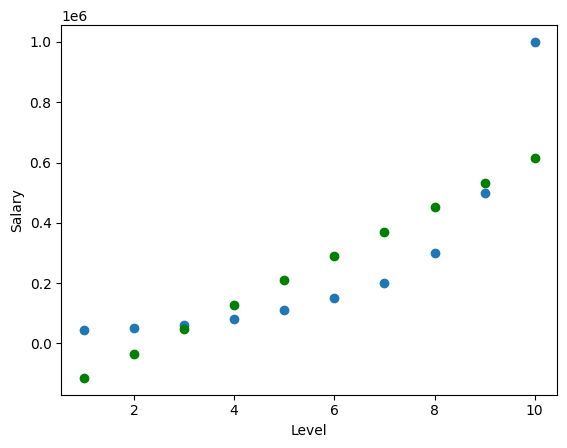

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Level')
plt.ylabel("Salary")
plt.scatter(X,y)
plt.scatter(X,y_pred,c='green')

In [11]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score:',r2_score(y,y_pred))
print('MAE:',mean_absolute_error(y,y_pred))

R2 score: 0.6690412331929895
MAE: 128454.54545454546


r2 score is less so we do polynomial regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(X)

In [13]:
plr=LinearRegression()
plr.fit(X_poly,y)

LinearRegression()

In [14]:
y_pred1=plr.predict(X_poly)
y_pred1

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391612])

In [15]:
result_poly=pd.DataFrame({'Actual':y,'Predicted':y_pred1})
result_poly

,Actual,Predicted
0,45000,53356.643357
1,50000,31759.906760
2,60000,58642.191142
3,80000,94632.867133
4,110000,121724.941725
5,150000,143275.058275
6,200000,184003.496504
7,300000,289994.172494
8,500000,528694.638695
9,1000000,988916.083916


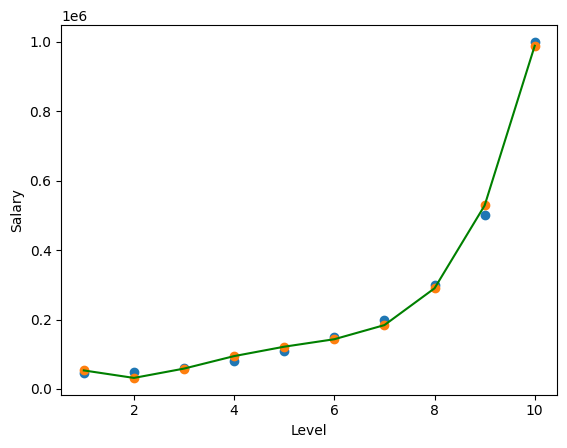

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Level')
plt.ylabel("Salary")
plt.scatter(X,y)
plt.scatter(X,y_pred1)
plt.plot(X,y_pred1,c='green')

In [17]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score:',r2_score(y,y_pred1))
print("MAE:",mean_absolute_error(y,y_pred1))

R2 score: 0.9973922891706614
MAE: 12681.818181828514


before inputting we need to transfrom as a polynomial

In [18]:
n=int(input('Enter the level:'))
y_new=plr.predict(poly.transform([[n]]))
print('salary is ,',y_new)

Enter the level:7
salary is , [184003.49650352]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
